# Implementando Regressão Linear do Zero

In [1]:
from numpy import *
import matplotlib.pyplot as plt
import time

### 1. Rode o mesmo programa nos dados contendo anos de escolaridade (primeira coluna) versus salário (segunda coluna).

In [2]:
def compute_error_for_line_given_points(b, m, points):
    totalError = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        totalError += (y - (m * x + b)) ** 2
    return totalError / float(len(points))

def step_gradient(b_current, m_current, points, learningRate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        b_gradient += -(2/N) * (y - ((m_current * x) + b_current))
        m_gradient += -(2/N) * x * (y - ((m_current * x) + b_current))
    new_b = b_current - (learningRate * b_gradient)
    new_m = m_current - (learningRate * m_gradient)
    return [new_b, new_m]

def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    for i in range(num_iterations):
        b, m = step_gradient(b, m, array(points), learning_rate)
    return [b, m]

points = genfromtxt("income.csv", delimiter=",") # os dados descrevem a relação "Anos de estudo" x "Salário"

learning_rate = 0.0001
initial_b = 0 
initial_m = 0 
num_iterations = 1000
print "Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points))
print "Running..."
[b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
print "After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, compute_error_for_line_given_points(b, m, points))

Starting gradient descent at b = 0, m = 0, error = 2946.63449705
Running...
After 1000 iterations b = -0.182342553765, m = 3.2621822676, error = 103.398422917


### 2. Modifique o código original para imprimir o RSS a cada iteração do gradiente descendente.

Ao executar o gradiente descedente, pode-se observar os valores dos coefiêntes linear, ângular e o RSS a cada iteração.

In [3]:
def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    rss = []
    for i in range(num_iterations):
        b, m = step_gradient(b, m, array(points), learning_rate)
        rss.append(compute_error_for_line_given_points(b, m, points)*float(len(points)))
        print "Iteration: {0} b: {1} m: {2} RSS: {3}".format(i, b, m, rss[i])
    return [b, m, rss]

print "Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points))
print "Running..."
[b, m, rss] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
print "After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, compute_error_for_line_given_points(b, m, points))

Starting gradient descent at b = 0, m = 0, error = 2946.63449705
Running...
Iteration: 0 b: 0.0100290938614 m: 0.174832456656 RSS: 79447.1437988
Iteration: 1 b: 0.0194967180427 m: 0.340232819504 RSS: 71435.2077787
Iteration: 2 b: 0.028433167538 m: 0.496710008983 RSS: 64264.5304096
Iteration: 3 b: 0.0368671027371 m: 0.644745486091 RSS: 57846.7784979
Iteration: 4 b: 0.0448256376224 m: 0.784794733993 RSS: 52102.893944
Iteration: 5 b: 0.0523344232075 m: 0.91728865969 RSS: 46962.119846
Iteration: 6 b: 0.0594177264732 m: 1.04263492005 RSS: 42361.1288638
Iteration: 7 b: 0.0660985050451 m: 1.16121917632 RSS: 38243.2431061
Iteration: 8 b: 0.0723984778412 m: 1.27340628089 RSS: 34557.7359297
Iteration: 9 b: 0.0783381919082 m: 1.37954140009 RSS: 31259.2070516
Iteration: 10 b: 0.0839370856509 m: 1.47995107638 RSS: 28307.0232743
Iteration: 11 b: 0.0892135486507 m: 1.57494423318 RSS: 25664.8179359
Iteration: 12 b: 0.0941849782562 m: 1.6648131256 RSS: 23300.0429191
Iteration: 13 b: 0.0988678331199 m: 

Iteration: 733 b: -0.0828863764198 m: 3.25626184451 RSS: 3113.14803419
Iteration: 734 b: -0.0832607431856 m: 3.2562841298 RSS: 3113.10584025
Iteration: 735 b: -0.0836351063909 m: 3.25630641488 RSS: 3113.06364712
Iteration: 736 b: -0.0840094660359 m: 3.25632869974 RSS: 3113.0214548
Iteration: 737 b: -0.0843838221205 m: 3.25635098439 RSS: 3112.97926327
Iteration: 738 b: -0.0847581746448 m: 3.25637326884 RSS: 3112.93707255
Iteration: 739 b: -0.0851325236088 m: 3.25639555306 RSS: 3112.89488263
Iteration: 740 b: -0.0855068690125 m: 3.25641783708 RSS: 3112.85269351
Iteration: 741 b: -0.085881210856 m: 3.25644012089 RSS: 3112.8105052
Iteration: 742 b: -0.0862555491393 m: 3.25646240448 RSS: 3112.76831769
Iteration: 743 b: -0.0866298838624 m: 3.25648468786 RSS: 3112.72613098
Iteration: 744 b: -0.0870042150254 m: 3.25650697103 RSS: 3112.68394507
Iteration: 745 b: -0.0873785426284 m: 3.25652925399 RSS: 3112.64175997
Iteration: 746 b: -0.0877528666712 m: 3.25655153673 RSS: 3112.59957566
Iteration:

### 3. O que acontece com o RSS ao longo das iterações (aumenta ou diminui) se você usar 1000 iterações? Plote o RSS vs número de iterações.

Ao plotar o RSS é possivel perceber que este decresce rapidamente. Por volta da iteração 60 o RSS converge para aproximadamente 3100 e não apresenta mais variações significativas.

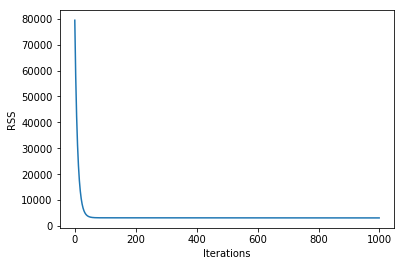

In [4]:
plt.plot(rss)
plt.xlabel('Iterations')
plt.ylabel('RSS')
plt.show()

### 4. Teste valores diferentes do número de iterações e learning_rate até que w0 e w1 sejam aproximadamente iguais a -39 e 5 respectivamente. Reporte os valores do número de iterações e learning_rate usados para atingir esses valores.

A fim de aproximar os valores dos coefiecientes para b = -39 e m = 5, encontrei os valores de learning_rate = 0.0037 e  num_iterations = 12750.

In [5]:
learning_rate = 0.0037
num_iterations = 12750
print "Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points))
print "Running..."
b, m, rss = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
print "After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, compute_error_for_line_given_points(b, m, points))

Starting gradient descent at b = 0, m = 0, error = 2946.63449705
Running...
Iteration: 0 b: 0.37107647287 m: 6.46880089626 RSS: 87781.563087
Iteration: 1 b: -0.0264990462753 m: 0.025065370216 RSS: 87168.5416234
Iteration: 2 b: 0.341805779704 m: 6.44714037816 RSS: 86559.9383782
Iteration: 3 b: -0.0529885309696 m: 0.0499604919138 RSS: 85955.7214408
Iteration: 4 b: 0.312564734787 m: 6.4256471605 RSS: 85355.8591314
Iteration: 5 b: -0.0794683951828 m: 0.0746865873685 RSS: 84760.319999
Iteration: 6 b: 0.283353251868 m: 6.40432002706 RSS: 84169.0728196
Iteration: 7 b: -0.10593858053 m: 0.099244870031 RSS: 83582.086595
Iteration: 8 b: 0.254171245225 m: 6.38315777043 RSS: 82999.3305508
Iteration: 9 b: -0.132399029139 m: 0.123636544591 RSS: 82420.774135
Iteration: 10 b: 0.225018629668 m: 6.36215919191 RSS: 81846.3870163
Iteration: 11 b: -0.158849683643 m: 0.147862807042 RSS: 81276.1390824
Iteration: 12 b: 0.195895320532 m: 6.34132310147 RSS: 80710.0004386
Iteration: 13 b: -0.185290487184 m: 0.17

Iteration: 1065 b: -12.2116805208 m: 3.91006756909 RSS: 1994.56369667
Iteration: 1066 b: -12.2131896123 m: 4.04630385852 RSS: 1993.54531864
Iteration: 1067 b: -12.2308179131 m: 3.91169943854 RSS: 1992.52942398
Iteration: 1068 b: -12.2323786012 m: 4.046955263 RSS: 1991.51599819
Iteration: 1069 b: -12.2499420298 m: 3.9133269587 RSS: 1990.50502686
Iteration: 1070 b: -12.2515538979 m: 4.04760939854 RSS: 1989.49649567
Iteration: 1071 b: -12.2690528789 m: 3.91495015574 RSS: 1988.49039042
Iteration: 1072 b: -12.2707155132 m: 4.0482662402 RSS: 1987.48669702
Iteration: 1073 b: -12.2881504684 m: 3.91656905568 RSS: 1986.48540144
Iteration: 1074 b: -12.2898634582 m: 4.04892576319 RSS: 1985.48648978
Iteration: 1075 b: -12.3072348061 m: 3.91818368432 RSS: 1984.48994824
Iteration: 1076 b: -12.3089977439 m: 4.04958794292 RSS: 1983.49576311
Iteration: 1077 b: -12.3263059002 m: 3.9197940673 RSS: 1982.50392075
Iteration: 1078 b: -12.3281183812 m: 4.05025275496 RSS: 1981.51440767
Iteration: 1079 b: -12.34

Iteration: 2470 b: -22.8339277988 m: 4.61100341851 RSS: 1289.9524527
Iteration: 2471 b: -22.839823065 m: 4.61051876639 RSS: 1289.67443753
Iteration: 2472 b: -22.8456173233 m: 4.61169624838 RSS: 1289.39661804
Iteration: 2473 b: -22.8515081181 m: 4.61121736644 RSS: 1289.11899411
Iteration: 2474 b: -22.8572986213 m: 4.61238861039 RSS: 1288.8415656
Iteration: 2475 b: -22.8631849501 m: 4.61191545535 RSS: 1288.56433237
Iteration: 2476 b: -22.8689716985 m: 4.61308050471 RSS: 1288.28729428
Iteration: 2477 b: -22.8748535669 m: 4.6126130336 RSS: 1288.01045119
Iteration: 2478 b: -22.8806365608 m: 4.61377193154 RSS: 1287.73380297
Iteration: 2479 b: -22.8865139741 m: 4.61331010171 RSS: 1287.45734948
Iteration: 2480 b: -22.8922932138 m: 4.61446289107 RSS: 1287.18109057
Iteration: 2481 b: -22.8981661775 m: 4.61400666017 RSS: 1286.90502613
Iteration: 2482 b: -22.9039416634 m: 4.61515338348 RSS: 1286.62915599
Iteration: 2483 b: -22.9098101829 m: 4.61470270947 RSS: 1286.35348004
Iteration: 2484 b: -22.9

Iteration: 3751 b: -28.8627863254 m: 4.96946647524 RSS: 1055.22178105
Iteration: 3752 b: -28.8665100644 m: 4.96969618076 RSS: 1055.1089447
Iteration: 3753 b: -28.8702334448 m: 4.96990981614 RSS: 1054.99618774
Iteration: 3754 b: -28.8739545667 m: 4.9701393078 RSS: 1054.88351013
Iteration: 3755 b: -28.8776753241 m: 4.97035284489 RSS: 1054.7709118
Iteration: 3756 b: -28.8813938306 m: 4.97058212321 RSS: 1054.65839271
Iteration: 3757 b: -28.8851119668 m: 4.97079556171 RSS: 1054.54595279
Iteration: 3758 b: -28.8888278599 m: 4.97102462722 RSS: 1054.43359199
Iteration: 3759 b: -28.8925433767 m: 4.97123796682 RSS: 1054.32131025
Iteration: 3760 b: -28.8962566581 m: 4.97146682004 RSS: 1054.20910752
Iteration: 3761 b: -28.8999695575 m: 4.97168006046 RSS: 1054.09698374
Iteration: 3762 b: -28.903680229 m: 4.9719087019 RSS: 1053.98493886
Iteration: 3763 b: -28.9073905128 m: 4.97212184282 RSS: 1053.87297282
Iteration: 3764 b: -28.9110985763 m: 4.97235027301 RSS: 1053.76108556
Iteration: 3765 b: -28.91

Iteration: 3889 b: -29.3645350283 m: 4.99933613571 RSS: 1040.37752962
Iteration: 3890 b: -29.3680823947 m: 4.99955217773 RSS: 1040.27513851
Iteration: 3891 b: -29.3716290899 m: 4.99975844835 RSS: 1040.17281945
Iteration: 3892 b: -29.3751739621 m: 4.99997430667 RSS: 1040.07057239
Iteration: 3893 b: -29.3787181598 m: 5.00018046371 RSS: 1039.96839727
Iteration: 3894 b: -29.3822605395 m: 5.0003961387 RSS: 1039.86629405
Iteration: 3895 b: -29.3858022414 m: 5.000602182 RSS: 1039.76426268
Iteration: 3896 b: -29.3893421303 m: 5.00081767402 RSS: 1039.6623031
Iteration: 3897 b: -29.3928813383 m: 5.00102360344 RSS: 1039.56041527
Iteration: 3898 b: -29.3964187382 m: 5.00123891283 RSS: 1039.45859913
Iteration: 3899 b: -29.3999554539 m: 5.00144472823 RSS: 1039.35685463
Iteration: 3900 b: -29.4034903665 m: 5.00165985535 RSS: 1039.25518173
Iteration: 3901 b: -29.4070245918 m: 5.00186555658 RSS: 1039.15358037
Iteration: 3902 b: -29.4105570188 m: 5.00208050178 RSS: 1039.0520505
Iteration: 3903 b: -29.41

Iteration: 4996 b: -32.6176992017 m: 5.1929928398 RSS: 961.620507345
Iteration: 4997 b: -32.620102107 m: 5.19313579172 RSS: 961.573534079
Iteration: 4998 b: -32.6225041563 m: 5.19327886861 RSS: 961.526593866
Iteration: 4999 b: -32.6249053707 m: 5.19342172051 RSS: 961.479686682
Iteration: 5000 b: -32.6273057298 m: 5.19356469616 RSS: 961.432812506
Iteration: 5001 b: -32.6297052545 m: 5.19370744811 RSS: 961.385971312
Iteration: 5002 b: -32.6321039246 m: 5.19385032258 RSS: 961.339163079
Iteration: 5003 b: -32.6345017609 m: 5.19399297465 RSS: 961.292387782
Iteration: 5004 b: -32.6368987432 m: 5.19413574802 RSS: 961.245645399
Iteration: 5005 b: -32.6392948922 m: 5.19427830028 RSS: 961.198935907
Iteration: 5006 b: -32.6416901879 m: 5.19442097263 RSS: 961.152259282
Iteration: 5007 b: -32.6440846508 m: 5.19456342513 RSS: 961.105615502
Iteration: 5008 b: -32.646478261 m: 5.19470599653 RSS: 961.059004542
Iteration: 5009 b: -32.648871039 m: 5.19484834935 RSS: 961.012426381
Iteration: 5010 b: -32.6

Iteration: 6301 b: -35.1324687777 m: 5.3426918914 RSS: 921.505459002
Iteration: 6302 b: -35.1339867559 m: 5.34278225432 RSS: 921.486712925
Iteration: 6303 b: -35.1355041999 m: 5.34287258389 RSS: 921.467980039
Iteration: 6304 b: -35.1370211099 m: 5.34296288321 RSS: 921.449260334
Iteration: 6305 b: -35.1385374862 m: 5.34305314923 RSS: 921.430553802
Iteration: 6306 b: -35.1400533288 m: 5.34314338501 RSS: 921.411860432
Iteration: 6307 b: -35.1415686381 m: 5.34323358751 RSS: 921.393180216
Iteration: 6308 b: -35.143083414 m: 5.34332375979 RSS: 921.374513145
Iteration: 6309 b: -35.144597657 m: 5.34341389883 RSS: 921.355859209
Iteration: 6310 b: -35.1461113671 m: 5.34350400765 RSS: 921.337218399
Iteration: 6311 b: -35.1476245447 m: 5.34359408326 RSS: 921.318590705
Iteration: 6312 b: -35.1491371896 m: 5.34368412868 RSS: 921.299976119
Iteration: 6313 b: -35.1506493024 m: 5.34377414092 RSS: 921.281374632
Iteration: 6314 b: -35.152160883 m: 5.34386412296 RSS: 921.262786233
Iteration: 6315 b: -35.1

Iteration: 6446 b: -35.3470913517 m: 5.35546793546 RSS: 918.920483805
Iteration: 6447 b: -35.3485338064 m: 5.35555380138 RSS: 918.903556661
Iteration: 6448 b: -35.3499757534 m: 5.355639638 RSS: 918.886641428
Iteration: 6449 b: -35.3514171931 m: 5.3557254435 RSS: 918.869738097
Iteration: 6450 b: -35.3528581255 m: 5.35581121972 RSS: 918.852846661
Iteration: 6451 b: -35.3542985509 m: 5.35589696485 RSS: 918.83596711
Iteration: 6452 b: -35.3557384694 m: 5.35598268071 RSS: 918.819099437
Iteration: 6453 b: -35.3571778813 m: 5.35606836551 RSS: 918.802243632
Iteration: 6454 b: -35.3586167866 m: 5.35615402105 RSS: 918.785399689
Iteration: 6455 b: -35.3600551856 m: 5.35623964555 RSS: 918.768567598
Iteration: 6456 b: -35.3614930784 m: 5.35632524082 RSS: 918.75174735
Iteration: 6457 b: -35.3629304652 m: 5.35641080508 RSS: 918.734938939
Iteration: 6458 b: -35.3643673462 m: 5.35649634011 RSS: 918.718142354
Iteration: 6459 b: -35.3658037217 m: 5.35658184417 RSS: 918.701357589
Iteration: 6460 b: -35.36

Iteration: 7530 b: -36.6472414512 m: 5.43286321494 RSS: 906.080615838
Iteration: 7531 b: -36.6482263963 m: 5.4329218467 RSS: 906.072723543
Iteration: 7532 b: -36.6492109947 m: 5.43298045784 RSS: 906.064836801
Iteration: 7533 b: -36.6501952467 m: 5.43303904834 RSS: 906.056955608
Iteration: 7534 b: -36.6511791523 m: 5.43309761824 RSS: 906.049079961
Iteration: 7535 b: -36.6521627117 m: 5.43315616752 RSS: 906.041209856
Iteration: 7536 b: -36.653145925 m: 5.4332146962 RSS: 906.033345289
Iteration: 7537 b: -36.6541287923 m: 5.43327320428 RSS: 906.025486255
Iteration: 7538 b: -36.6551113138 m: 5.43333169178 RSS: 906.017632752
Iteration: 7539 b: -36.6560934895 m: 5.43339015869 RSS: 906.009784775
Iteration: 7540 b: -36.6570753196 m: 5.43344860504 RSS: 906.00194232
Iteration: 7541 b: -36.6580568042 m: 5.4335070308 RSS: 905.994105383
Iteration: 7542 b: -36.6590379434 m: 5.43356543602 RSS: 905.986273961
Iteration: 7543 b: -36.6600187374 m: 5.43362382068 RSS: 905.97844805
Iteration: 7544 b: -36.660

Iteration: 7736 b: -36.8429938683 m: 5.44451595648 RSS: 904.566648269
Iteration: 7737 b: -36.8439099301 m: 5.44457048776 RSS: 904.559821285
Iteration: 7738 b: -36.8448256695 m: 5.44462499986 RSS: 904.552999106
Iteration: 7739 b: -36.8457410866 m: 5.44467949277 RSS: 904.546181727
Iteration: 7740 b: -36.8466561816 m: 5.44473396651 RSS: 904.539369145
Iteration: 7741 b: -36.8475709547 m: 5.44478842108 RSS: 904.532561356
Iteration: 7742 b: -36.8484854058 m: 5.44484285649 RSS: 904.525758359
Iteration: 7743 b: -36.8493995351 m: 5.44489727274 RSS: 904.518960148
Iteration: 7744 b: -36.8503133428 m: 5.44495166984 RSS: 904.51216672
Iteration: 7745 b: -36.8512268289 m: 5.4450060478 RSS: 904.505378073
Iteration: 7746 b: -36.8521399935 m: 5.44506040663 RSS: 904.498594203
Iteration: 7747 b: -36.8530528369 m: 5.44511474633 RSS: 904.491815106
Iteration: 7748 b: -36.853965359 m: 5.44516906691 RSS: 904.485040779
Iteration: 7749 b: -36.85487756 m: 5.44522336837 RSS: 904.478271219
Iteration: 7750 b: -36.85

Iteration: 8858 b: -37.69229737 m: 5.49507325913 RSS: 899.268731622
Iteration: 8859 b: -37.6929145705 m: 5.49510999981 RSS: 899.265632549
Iteration: 8860 b: -37.6935315538 m: 5.49514672756 RSS: 899.262535656
Iteration: 8861 b: -37.6941483199 m: 5.4951834424 RSS: 899.259440943
Iteration: 8862 b: -37.6947648691 m: 5.49522014431 RSS: 899.256348407
Iteration: 8863 b: -37.6953812013 m: 5.4952568333 RSS: 899.253258047
Iteration: 8864 b: -37.6959973166 m: 5.49529350939 RSS: 899.250169862
Iteration: 8865 b: -37.6966132151 m: 5.49533017257 RSS: 899.24708385
Iteration: 8866 b: -37.6972288968 m: 5.49536682285 RSS: 899.244000009
Iteration: 8867 b: -37.697844362 m: 5.49540346023 RSS: 899.240918338
Iteration: 8868 b: -37.6984596105 m: 5.49544008472 RSS: 899.237838836
Iteration: 8869 b: -37.6990746425 m: 5.49547669632 RSS: 899.234761501
Iteration: 8870 b: -37.6996894582 m: 5.49551329504 RSS: 899.231686331
Iteration: 8871 b: -37.7003040574 m: 5.49554988087 RSS: 899.228613324
Iteration: 8872 b: -37.700

Iteration: 10108 b: -38.3165749053 m: 5.53223522564 RSS: 896.691512066
Iteration: 10109 b: -38.3169724289 m: 5.53225888941 RSS: 896.690226469
Iteration: 10110 b: -38.3173698125 m: 5.53228254484 RSS: 896.688941776
Iteration: 10111 b: -38.3177670564 m: 5.53230619196 RSS: 896.687657987
Iteration: 10112 b: -38.3181641604 m: 5.53232983075 RSS: 896.686375101
Iteration: 10113 b: -38.3185611247 m: 5.53235346122 RSS: 896.685093118
Iteration: 10114 b: -38.3189579493 m: 5.53237708338 RSS: 896.683812037
Iteration: 10115 b: -38.3193546343 m: 5.53240069723 RSS: 896.682531858
Iteration: 10116 b: -38.3197511797 m: 5.53242430277 RSS: 896.681252579
Iteration: 10117 b: -38.3201475855 m: 5.5324479 RSS: 896.679974201
Iteration: 10118 b: -38.3205438519 m: 5.53247148892 RSS: 896.678696722
Iteration: 10119 b: -38.3209399788 m: 5.53249506955 RSS: 896.677420142
Iteration: 10120 b: -38.3213359663 m: 5.53251864188 RSS: 896.67614446
Iteration: 10121 b: -38.3217318145 m: 5.53254220591 RSS: 896.674869676
Iteration: 

Iteration: 10274 b: -38.3806844253 m: 5.53605153441 RSS: 896.490028414
Iteration: 10275 b: -38.3810593893 m: 5.53607385526 RSS: 896.488884592
Iteration: 10276 b: -38.3814342214 m: 5.53609616825 RSS: 896.487741574
Iteration: 10277 b: -38.3818089217 m: 5.53611847338 RSS: 896.486599361
Iteration: 10278 b: -38.38218349 m: 5.53614077067 RSS: 896.485457951
Iteration: 10279 b: -38.3825579266 m: 5.53616306012 RSS: 896.484317345
Iteration: 10280 b: -38.3829322314 m: 5.53618534172 RSS: 896.483177541
Iteration: 10281 b: -38.3833064044 m: 5.53620761548 RSS: 896.482038539
Iteration: 10282 b: -38.3836804458 m: 5.5362298814 RSS: 896.480900339
Iteration: 10283 b: -38.3840543556 m: 5.53625213948 RSS: 896.479762939
Iteration: 10284 b: -38.3844281338 m: 5.53627438974 RSS: 896.47862634
Iteration: 10285 b: -38.3848017805 m: 5.53629663216 RSS: 896.477490541
Iteration: 10286 b: -38.3851752957 m: 5.53631886676 RSS: 896.476355541
Iteration: 10287 b: -38.3855486795 m: 5.53634109353 RSS: 896.475221339
Iteration:

Iteration: 11443 b: -38.7401010597 m: 5.55744687251 RSS: 895.578379335
Iteration: 11444 b: -38.7403495487 m: 5.55746166455 RSS: 895.577877
Iteration: 11445 b: -38.7405979503 m: 5.55747645139 RSS: 895.577375018
Iteration: 11446 b: -38.7408462644 m: 5.55749123302 RSS: 895.57687339
Iteration: 11447 b: -38.7410944912 m: 5.55750600945 RSS: 895.576372114
Iteration: 11448 b: -38.7413426306 m: 5.55752078069 RSS: 895.575871191
Iteration: 11449 b: -38.7415906827 m: 5.55753554672 RSS: 895.575370621
Iteration: 11450 b: -38.7418386475 m: 5.55755030756 RSS: 895.574870403
Iteration: 11451 b: -38.742086525 m: 5.5575650632 RSS: 895.574370537
Iteration: 11452 b: -38.7423343154 m: 5.55757981366 RSS: 895.573871022
Iteration: 11453 b: -38.7425820185 m: 5.55759455892 RSS: 895.573371859
Iteration: 11454 b: -38.7428296345 m: 5.55760929899 RSS: 895.572873047
Iteration: 11455 b: -38.7430771633 m: 5.55762403388 RSS: 895.572374587
Iteration: 11456 b: -38.743324605 m: 5.55763876358 RSS: 895.571876477
Iteration: 11

### 5. O algoritmo do vídeo usa o número de iterações como critério de parada. Mude o algoritmo para considerar um critério de parada que é relacionado ao tamanho do gradiente (como no algoritmo apresentado em sala). Plote o tamanho do gradiente vs número de iterações.

O algortimo utiliza como critério de parada o tamanho do gradiente ser menor que 0.1

In [6]:
def gradient_descent_runner(points, starting_b, starting_m, learning_rate):
    b = starting_b
    m = starting_m
    rss = []
    gradient_size = []
    iteration = 0
    size = 0.1
    size_current = float("inf")
    while (size_current >= size):
        b, m, size_current = step_gradient(b, m, array(points), learning_rate)
        rss.append(compute_error_for_line_given_points(b, m, points)*float(len(points)))
        gradient_size.append(size_current)
        print "Iteration: {0} b: {1} m: {2} RSS: {3} gradient_size: {4}".format(iteration, b, m, rss[iteration], size_current)
        iteration = iteration + 1
    return [b, m, rss, gradient_size, iteration]

def step_gradient(b_current, m_current, points, learningRate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        b_gradient += -(2/N) * (y - ((m_current * x) + b_current))
        m_gradient += -(2/N) * (y - ((m_current * x) + b_current)) * x
    new_b = b_current - (learningRate * b_gradient)
    new_m = m_current - (learningRate * m_gradient)
    gradient_size = math.sqrt(b_gradient**2 + m_gradient**2)
    return [new_b, new_m, gradient_size]

print "Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points))
print "Running..."
b, m, rss, gradient_size, iteration = gradient_descent_runner(points, initial_b, initial_m, learning_rate)
print "After {0} iterations b = {1}, m = {2}, error = {3}".format(iteration, b, m, compute_error_for_line_given_points(b, m, points))

Starting gradient descent at b = 0, m = 0, error = 2946.63449705
Running...
Iteration: 0 b: 0.37107647287 m: 6.46880089626 RSS: 87781.563087 gradient_size: 1751.19875011
Iteration: 1 b: -0.0264990462753 m: 0.025065370216 RSS: 87168.5416234 gradient_size: 1744.86188885
Iteration: 2 b: 0.341805779704 m: 6.44714037816 RSS: 86559.9383782 gradient_size: 1738.54795824
Iteration: 3 b: -0.0529885309696 m: 0.0499604919138 RSS: 85955.7214408 gradient_size: 1732.2568753
Iteration: 4 b: 0.312564734787 m: 6.4256471605 RSS: 85355.8591314 gradient_size: 1725.98855734
Iteration: 5 b: -0.0794683951828 m: 0.0746865873685 RSS: 84760.319999 gradient_size: 1719.742922
Iteration: 6 b: 0.283353251868 m: 6.40432002706 RSS: 84169.0728196 gradient_size: 1713.5198872
Iteration: 7 b: -0.10593858053 m: 0.099244870031 RSS: 83582.086595 gradient_size: 1707.31937115
Iteration: 8 b: 0.254171245225 m: 6.38315777043 RSS: 82999.3305508 gradient_size: 1701.14129237
Iteration: 9 b: -0.132399029139 m: 0.123636544591 RSS: 82

Iteration: 1256 b: -13.9764790577 m: 4.11744262322 RSS: 1832.82350945 gradient_size: 18.6050350089
Iteration: 1257 b: -13.9894818464 m: 4.05009296076 RSS: 1832.10227634 gradient_size: 18.5387469541
Iteration: 1258 b: -13.9944142144 m: 4.11826375407 RSS: 1831.38199308 gradient_size: 18.4727017421
Iteration: 1259 b: -14.0073815048 m: 4.05140411123 RSS: 1830.66265581 gradient_size: 18.4068985025
Iteration: 1260 b: -14.0123366556 m: 4.11908590882 RSS: 1829.94426068 gradient_size: 18.3413363678
Iteration: 1261 b: -14.0252686631 m: 4.0527127432 RSS: 1829.2268039 gradient_size: 18.2760144737
Iteration: 1262 b: -14.0302463909 m: 4.11990907518 RSS: 1828.51028166 gradient_size: 18.210931959
Iteration: 1263 b: -14.0431433292 m: 4.05401886998 RSS: 1827.79469022 gradient_size: 18.1460879659
Iteration: 1264 b: -14.0481434299 m: 4.12073324096 RSS: 1827.08002582 gradient_size: 18.0814816394
Iteration: 1265 b: -14.0610055114 m: 4.05532250476 RSS: 1826.36628476 gradient_size: 18.0171121277
Iteration: 12

Iteration: 2578 b: -23.4535323935 m: 4.64775161686 RSS: 1261.0298497 gradient_size: 1.53187630205
Iteration: 2579 b: -23.4591935723 m: 4.64752373444 RSS: 1260.77219108 gradient_size: 1.53128744148
Iteration: 2580 b: -23.4647858772 m: 4.64841946968 RSS: 1260.5147138 gradient_size: 1.53069912894
Iteration: 2581 b: -23.470442854 m: 4.64819541788 RSS: 1260.25741772 gradient_size: 1.5301113619
Iteration: 2582 b: -23.4760314415 m: 4.64908686584 RSS: 1260.00030272 gradient_size: 1.52952413789
Iteration: 2583 b: -23.4816842209 m: 4.64886661545 RSS: 1259.74336867 gradient_size: 1.52893745441
Iteration: 2584 b: -23.487269092 m: 4.64975380557 RSS: 1259.48661545 gradient_size: 1.52835130899
Iteration: 2585 b: -23.4929176785 m: 4.6495373276 RSS: 1259.23004292 gradient_size: 1.5277656992
Iteration: 2586 b: -23.4984988344 m: 4.6504202891 RSS: 1258.97365095 gradient_size: 1.52718062259
Iteration: 2587 b: -23.5041432324 m: 4.65020755475 RSS: 1258.71743943 gradient_size: 1.52659607676
Iteration: 2588 b:

Iteration: 3825 b: -29.1348682521 m: 4.98566390404 RSS: 1047.08276804 gradient_size: 0.982751596499
Iteration: 3826 b: -29.1384963604 m: 4.98588602536 RSS: 1046.97565875 gradient_size: 0.982405766996
Iteration: 3827 b: -29.1421239199 m: 4.98609584137 RSS: 1046.86862483 gradient_size: 0.982060059249
Iteration: 3828 b: -29.1457494776 m: 4.98631776645 RSS: 1046.76166623 gradient_size: 0.981714473217
Iteration: 3829 b: -29.1493744821 m: 4.98652747462 RSS: 1046.65478288 gradient_size: 0.981369008855
Iteration: 3830 b: -29.1529974911 m: 4.98674920388 RSS: 1046.54797475 gradient_size: 0.98102366612
Iteration: 3831 b: -29.1566199425 m: 4.986958804 RSS: 1046.44124177 gradient_size: 0.980678444969
Iteration: 3832 b: -29.1602404045 m: 4.98718033788 RSS: 1046.3345839 gradient_size: 0.98033334536
Iteration: 3833 b: -29.1638603046 m: 4.98738982973 RSS: 1046.22800107 gradient_size: 0.979988367248
Iteration: 3834 b: -29.1674782213 m: 4.98761116864 RSS: 1046.12149325 gradient_size: 0.97964351059
Iterat

Iteration: 5157 b: -32.9938756718 m: 5.21538578791 RSS: 954.468089238 gradient_size: 0.614958749326
Iteration: 5158 b: -32.9961461962 m: 5.21552099675 RSS: 954.426148813 gradient_size: 0.614742351585
Iteration: 5159 b: -32.9984159275 m: 5.21565606024 RSS: 954.384237899 gradient_size: 0.614526029992
Iteration: 5160 b: -33.0006848543 m: 5.21579117362 RSS: 954.342356477 gradient_size: 0.614309784521
Iteration: 5161 b: -33.0029529885 m: 5.21592614238 RSS: 954.300504524 gradient_size: 0.614093615144
Iteration: 5162 b: -33.0052203187 m: 5.21606116038 RSS: 954.258682021 gradient_size: 0.613877521835
Iteration: 5163 b: -33.0074868569 m: 5.21619603449 RSS: 954.216888946 gradient_size: 0.613661504567
Iteration: 5164 b: -33.0097525918 m: 5.21633095716 RSS: 954.17512528 gradient_size: 0.613445563314
Iteration: 5165 b: -33.0120175351 m: 5.21646573668 RSS: 954.133391001 gradient_size: 0.613229698048
Iteration: 5166 b: -33.0142816756 m: 5.2166005641 RSS: 954.091686088 gradient_size: 0.613013908743
It

Iteration: 6422 b: -35.3123196989 m: 5.35339805001 RSS: 919.330330421 gradient_size: 0.39399420324
Iteration: 6423 b: -35.3137743893 m: 5.35348464426 RSS: 919.313114886 gradient_size: 0.39385556068
Iteration: 6424 b: -35.3152285679 m: 5.35357120904 RSS: 919.295911465 gradient_size: 0.393716966908
Iteration: 6425 b: -35.3166822347 m: 5.35365774236 RSS: 919.278720149 gradient_size: 0.393578421905
Iteration: 6426 b: -35.31813539 m: 5.35374424622 RSS: 919.26154093 gradient_size: 0.393439925654
Iteration: 6427 b: -35.319588034 m: 5.35383071866 RSS: 919.244373799 gradient_size: 0.393301478139
Iteration: 6428 b: -35.3210401668 m: 5.35391716165 RSS: 919.227218748 gradient_size: 0.393163079342
Iteration: 6429 b: -35.3224917886 m: 5.35400357324 RSS: 919.210075768 gradient_size: 0.393024729247
Iteration: 6430 b: -35.3239428996 m: 5.3540899554 RSS: 919.192944851 gradient_size: 0.392886427835
Iteration: 6431 b: -35.3253935 m: 5.35417630619 RSS: 919.175825988 gradient_size: 0.39274817509
Iteration: 

Iteration: 7680 b: -36.7911764168 m: 5.44143136944 RSS: 904.956731673 gradient_size: 0.253048422721
Iteration: 7681 b: -36.7921107126 m: 5.44148698615 RSS: 904.949630205 gradient_size: 0.25295937755
Iteration: 7682 b: -36.7930446796 m: 5.4415425833 RSS: 904.942533734 gradient_size: 0.252870363713
Iteration: 7683 b: -36.793978318 m: 5.44159816088 RSS: 904.935442257 gradient_size: 0.2527813812
Iteration: 7684 b: -36.7949116278 m: 5.44165371892 RSS: 904.928355769 gradient_size: 0.252692429999
Iteration: 7685 b: -36.7958446092 m: 5.44170925739 RSS: 904.921274268 gradient_size: 0.252603510098
Iteration: 7686 b: -36.7967772623 m: 5.44176477633 RSS: 904.91419775 gradient_size: 0.252514621488
Iteration: 7687 b: -36.7977095872 m: 5.44182027572 RSS: 904.907126212 gradient_size: 0.252425764156
Iteration: 7688 b: -36.798641584 m: 5.44187575559 RSS: 904.900059649 gradient_size: 0.252336938093
Iteration: 7689 b: -36.7995732529 m: 5.44193121593 RSS: 904.892998059 gradient_size: 0.252248143287
Iterati

Iteration: 8987 b: -37.7701495561 m: 5.49970764074 RSS: 898.886430256 gradient_size: 0.159745175996
Iteration: 8988 b: -37.7707393612 m: 5.49974275063 RSS: 898.883600191 gradient_size: 0.15968896329
Iteration: 8989 b: -37.7713289587 m: 5.49977784817 RSS: 898.880772118 gradient_size: 0.159632770366
Iteration: 8990 b: -37.7719183488 m: 5.49981293336 RSS: 898.877946034 gradient_size: 0.159576597215
Iteration: 8991 b: -37.7725075314 m: 5.4998480062 RSS: 898.87512194 gradient_size: 0.15952044383
Iteration: 8992 b: -37.7730965068 m: 5.4998830667 RSS: 898.872299832 gradient_size: 0.159464310206
Iteration: 8993 b: -37.7736852749 m: 5.49991811486 RSS: 898.86947971 gradient_size: 0.159408196334
Iteration: 8994 b: -37.7742738357 m: 5.49995315069 RSS: 898.866661573 gradient_size: 0.159352102208
Iteration: 8995 b: -37.7748621895 m: 5.49998817418 RSS: 898.863845419 gradient_size: 0.159296027822
Iteration: 8996 b: -37.7754503363 m: 5.50002318536 RSS: 898.861031246 gradient_size: 0.159239973167
Iterat

Iteration: 10284 b: -38.3844281338 m: 5.53627438974 RSS: 896.47862634 gradient_size: 0.101199968376
Iteration: 10285 b: -38.3848017805 m: 5.53629663216 RSS: 896.477490541 gradient_size: 0.101164357135
Iteration: 10286 b: -38.3851752957 m: 5.53631886676 RSS: 896.476355541 gradient_size: 0.101128758424
Iteration: 10287 b: -38.3855486795 m: 5.53634109353 RSS: 896.475221339 gradient_size: 0.101093172241
Iteration: 10288 b: -38.3859219319 m: 5.53636331248 RSS: 896.474087936 gradient_size: 0.10105759858
Iteration: 10289 b: -38.3862950529 m: 5.53638552361 RSS: 896.47295533 gradient_size: 0.101022037437
Iteration: 10290 b: -38.3866680426 m: 5.53640772693 RSS: 896.471823521 gradient_size: 0.100986488808
Iteration: 10291 b: -38.3870409011 m: 5.53642992243 RSS: 896.470692509 gradient_size: 0.100950952688
Iteration: 10292 b: -38.3874136284 m: 5.53645211013 RSS: 896.469562292 gradient_size: 0.100915429073
Iteration: 10293 b: -38.3877862245 m: 5.53647429001 RSS: 896.468432871 gradient_size: 0.100879

O tamanho do gradiente sofre grande redução em torno das primeiras 1000 iterações, após isso ele continua a reduzir, porém de suavemente. 

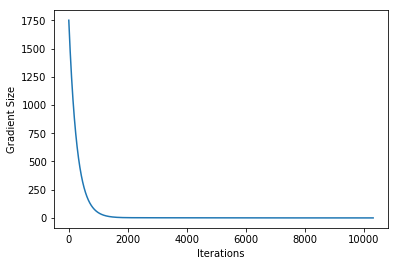

In [7]:
plt.plot(gradient_size)
plt.xlabel('Iterations')
plt.ylabel('Gradient Size')
plt.show()

### 6. Ache um valor de tolerância que se aproxime dos valores dos parâmetros do item 4 acima. Que valor foi esse?

O tamanho do gradiente menor que 0.042 foi o valor de tolerância que mais se aproximou dos parâmetros do item 4.

In [8]:
def gradient_descent_runner(points, starting_b, starting_m, learning_rate):
    b = starting_b
    m = starting_m
    rss = []
    gradient_size = []
    iterations = 0
    size = 0.042
    size_current = float("inf")
    while (size_current >= size):
        b, m, size_current = step_gradient(b, m, array(points), learning_rate)
        rss.append(compute_error_for_line_given_points(b, m, points)*float(len(points)))
        gradient_size.append(size_current)
        print "Iteration: {0} b: {1} m: {2} RSS: {3} gradient_size: {4}".format(iterations, b, m, rss[iterations], size_current)
        iterations = iterations + 1
    return [b, m, rss, gradient_size, iterations]

print "Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points))
print "Running..."
b, m, rss, gradient_size, iterations = gradient_descent_runner(points, initial_b, initial_m, learning_rate)
print "After {0} iterations b = {1}, m = {2}, error = {3}".format(iterations, b, m, compute_error_for_line_given_points(b, m, points))


Starting gradient descent at b = 0, m = 0, error = 2946.63449705
Running...
Iteration: 0 b: 0.37107647287 m: 6.46880089626 RSS: 87781.563087 gradient_size: 1751.19875011
Iteration: 1 b: -0.0264990462753 m: 0.025065370216 RSS: 87168.5416234 gradient_size: 1744.86188885
Iteration: 2 b: 0.341805779704 m: 6.44714037816 RSS: 86559.9383782 gradient_size: 1738.54795824
Iteration: 3 b: -0.0529885309696 m: 0.0499604919138 RSS: 85955.7214408 gradient_size: 1732.2568753
Iteration: 4 b: 0.312564734787 m: 6.4256471605 RSS: 85355.8591314 gradient_size: 1725.98855734
Iteration: 5 b: -0.0794683951828 m: 0.0746865873685 RSS: 84760.319999 gradient_size: 1719.742922
Iteration: 6 b: 0.283353251868 m: 6.40432002706 RSS: 84169.0728196 gradient_size: 1713.5198872
Iteration: 7 b: -0.10593858053 m: 0.099244870031 RSS: 83582.086595 gradient_size: 1707.31937115
Iteration: 8 b: 0.254171245225 m: 6.38315777043 RSS: 82999.3305508 gradient_size: 1701.14129237
Iteration: 9 b: -0.132399029139 m: 0.123636544591 RSS: 82

Iteration: 114 b: -1.25236253882 m: 5.4687990773 RSS: 40004.1346101 gradient_size: 1158.39398135
Iteration: 115 b: -1.51952439391 m: 1.20661563854 RSS: 39735.1321304 gradient_size: 1154.202254
Iteration: 116 b: -1.28006673213 m: 5.45496756531 RSS: 39468.0634347 gradient_size: 1150.02569494
Iteration: 117 b: -1.54538592517 m: 1.22357979028 RSS: 39202.9145598 gradient_size: 1145.86424928
Iteration: 118 b: -1.30774544363 m: 5.44124637056 RSS: 38939.6716436 gradient_size: 1141.71786235
Iteration: 119 b: -1.57123522475 m: 1.24043178447 RSS: 38678.3209237 gradient_size: 1137.58647964
Iteration: 120 b: -1.3353987345 m: 5.42763468879 RSS: 38418.8487375 gradient_size: 1133.47004686
Iteration: 121 b: -1.59707225814 m: 1.25717242402 RSS: 38161.2415209 gradient_size: 1129.36850991
Iteration: 122 b: -1.36302666557 m: 5.41413172154 RSS: 37905.4858078 gradient_size: 1125.2818149
Iteration: 123 b: -1.6228969912 m: 1.27380250606 RSS: 37651.5682295 gradient_size: 1121.20990811
Iteration: 124 b: -1.39062

Iteration: 1270 b: -14.1017584655 m: 4.12321161413 RSS: 1822.81130138 gradient_size: 17.6987871978
Iteration: 1271 b: -14.1145172351 m: 4.05921858789 RSS: 1822.10302378 gradient_size: 17.6358208615
Iteration: 1272 b: -14.1196048155 m: 4.12403965739 RSS: 1821.39564422 gradient_size: 17.5730854639
Iteration: 1273 b: -14.1323295625 m: 4.06051238497 RSS: 1820.68915918 gradient_size: 17.5105801779
Iteration: 1274 b: -14.1374385172 m: 4.12486864042 RSS: 1819.98356517 gradient_size: 17.4483041793
Iteration: 1275 b: -14.1501294463 m: 4.06180375474 RSS: 1819.2788587 gradient_size: 17.3862566466
Iteration: 1276 b: -14.1552595801 m: 4.12569855157 RSS: 1818.57503634 gradient_size: 17.3244367618
Iteration: 1277 b: -14.1679168949 m: 4.06309270987 RSS: 1817.87209465 gradient_size: 17.2628437095
Iteration: 1278 b: -14.1730680138 m: 4.12652937926 RSS: 1817.17003023 gradient_size: 17.2014766774
Iteration: 1279 b: -14.1856919161 m: 4.06437926292 RSS: 1816.4688397 gradient_size: 17.1403348562
Iteration: 1

Iteration: 1422 b: -15.4226910935 m: 4.18810325655 RSS: 1723.84897973 gradient_size: 10.3615317988
Iteration: 1423 b: -15.4333581321 m: 4.15141754896 RSS: 1723.24728241 gradient_size: 10.3256927573
Iteration: 1424 b: -15.4396026468 m: 4.18897491811 RSS: 1722.64614124 gradient_size: 10.2899879784
Iteration: 1425 b: -15.4502477447 m: 4.15255751308 RSS: 1722.04555487 gradient_size: 10.2544169871
Iteration: 1426 b: -15.4565022481 m: 4.18984684379 RSS: 1721.44552196 gradient_size: 10.2189793104
Iteration: 1427 b: -15.4671255249 m: 4.15369580077 RSS: 1720.84604116 gradient_size: 10.1836744769
Iteration: 1428 b: -15.4733899059 m: 4.19071902707 RSS: 1720.24711117 gradient_size: 10.1485020167
Iteration: 1429 b: -15.4839914805 m: 4.15483241951 RSS: 1719.64873064 gradient_size: 10.1134614621
Iteration: 1430 b: -15.4902656292 m: 4.19159146146 RSS: 1719.05089828 gradient_size: 10.0785523466
Iteration: 1431 b: -15.5008456197 m: 4.15596737676 RSS: 1718.45361278 gradient_size: 10.0437742057
Iteration:

Iteration: 2532 b: -23.1925036325 m: 4.63226445463 RSS: 1273.08039774 gradient_size: 1.55960355417
Iteration: 2533 b: -23.1982627442 m: 4.6319398943 RSS: 1272.81425802 gradient_size: 1.55898645471
Iteration: 2534 b: -23.2039408105 m: 4.63294287146 RSS: 1272.54830561 gradient_size: 1.55837003892
Iteration: 2535 b: -23.2096956116 m: 4.63262287582 RSS: 1272.28254038 gradient_size: 1.55775430338
Iteration: 2536 b: -23.2153699397 m: 4.63362082661 RSS: 1272.0169622 gradient_size: 1.55713924471
Iteration: 2537 b: -23.2211204352 m: 4.63330536112 RSS: 1271.75157094 gradient_size: 1.55652485955
Iteration: 2538 b: -23.2267910258 m: 4.63429832029 RSS: 1271.48636646 gradient_size: 1.55591114455
Iteration: 2539 b: -23.2325372205 m: 4.63398735066 RSS: 1271.22134864 gradient_size: 1.55529809639
Iteration: 2540 b: -23.2382040745 m: 4.63497535272 RSS: 1270.95651734 gradient_size: 1.55468571179
Iteration: 2541 b: -23.2439459732 m: 4.63466884491 RSS: 1270.69187243 gradient_size: 1.55407398745
Iteration: 2

Iteration: 2696 b: -24.1041174418 m: 4.68638113767 RSS: 1231.84445084 gradient_size: 1.4656126184
Iteration: 2697 b: -24.1095380266 m: 4.68633553325 RSS: 1231.60733113 gradient_size: 1.46507475572
Iteration: 2698 b: -24.1149130994 m: 4.68702244846 RSS: 1231.37037827 gradient_size: 1.4645372341
Iteration: 2699 b: -24.1203297275 m: 4.68697926901 RSS: 1231.13359216 gradient_size: 1.46400005238
Iteration: 2700 b: -24.1257011601 m: 4.68766331664 RSS: 1230.89697268 gradient_size: 1.46346320942
Iteration: 2701 b: -24.1311138353 m: 4.68762254316 RSS: 1230.66051971 gradient_size: 1.46292670406
Iteration: 2702 b: -24.1364816292 m: 4.68830374247 RSS: 1230.42423314 gradient_size: 1.46239053518
Iteration: 2703 b: -24.1418903554 m: 4.68826535611 RSS: 1230.18811284 gradient_size: 1.46185470163
Iteration: 2704 b: -24.147254512 m: 4.68894372619 RSS: 1229.9521587 gradient_size: 1.46131920231
Iteration: 2705 b: -24.152659293 m: 4.68890770824 RSS: 1229.7163706 gradient_size: 1.46078403609
Iteration: 2706 

Iteration: 3811 b: -29.0839353218 m: 4.98263181043 RSS: 1048.5902415 gradient_size: 0.987606018325
Iteration: 3812 b: -29.087581334 m: 4.98285531757 RSS: 1048.48207147 gradient_size: 0.987258479667
Iteration: 3813 b: -29.0912268288 m: 4.98306588234 RSS: 1048.37397755 gradient_size: 0.986911063374
Iteration: 3814 b: -29.0948702779 m: 4.9832891902 RSS: 1048.2659597 gradient_size: 0.986563769403
Iteration: 3815 b: -29.0985132051 m: 4.98349964867 RSS: 1048.15801785 gradient_size: 0.98621659771
Iteration: 3816 b: -29.1021540929 m: 4.98372275768 RSS: 1048.05015196 gradient_size: 0.985869548251
Iteration: 3817 b: -29.1057944542 m: 4.98393310963 RSS: 1047.94236197 gradient_size: 0.985522620983
Iteration: 3818 b: -29.1094327826 m: 4.98415602022 RSS: 1047.83464782 gradient_size: 0.985175815862
Iteration: 3819 b: -29.1130705799 m: 4.98436626543 RSS: 1047.72700947 gradient_size: 0.984829132846
Iteration: 3820 b: -29.1167063506 m: 4.98458897805 RSS: 1047.61944686 gradient_size: 0.98448257189
Iterat

Iteration: 5003 b: -32.6345017609 m: 5.19399297465 RSS: 961.292387782 gradient_size: 0.649209692171
Iteration: 5004 b: -32.6368987432 m: 5.19413574802 RSS: 961.245645399 gradient_size: 0.648981241869
Iteration: 5005 b: -32.6392948922 m: 5.19427830028 RSS: 961.198935907 gradient_size: 0.648752871957
Iteration: 5006 b: -32.6416901879 m: 5.19442097263 RSS: 961.152259282 gradient_size: 0.648524582405
Iteration: 5007 b: -32.6440846508 m: 5.19456342513 RSS: 961.105615502 gradient_size: 0.648296373187
Iteration: 5008 b: -32.646478261 m: 5.19470599653 RSS: 961.059004542 gradient_size: 0.648068244273
Iteration: 5009 b: -32.648871039 m: 5.19484834935 RSS: 961.012426381 gradient_size: 0.647840195635
Iteration: 5010 b: -32.651262965 m: 5.19499081988 RSS: 960.965880995 gradient_size: 0.647612227246
Iteration: 5011 b: -32.6536540593 m: 5.19513307308 RSS: 960.91936836 gradient_size: 0.647384339076
Iteration: 5012 b: -32.6560443022 m: 5.19527544282 RSS: 960.872888455 gradient_size: 0.647156531098
Iter

Iteration: 6311 b: -35.1476245447 m: 5.34359408326 RSS: 921.318590705 gradient_size: 0.409690846992
Iteration: 6312 b: -35.1491371896 m: 5.34368412868 RSS: 921.299976119 gradient_size: 0.409546680942
Iteration: 6313 b: -35.1506493024 m: 5.34377414092 RSS: 921.281374632 gradient_size: 0.409402565624
Iteration: 6314 b: -35.152160883 m: 5.34386412296 RSS: 921.262786233 gradient_size: 0.409258501018
Iteration: 6315 b: -35.1536719317 m: 5.34395407187 RSS: 921.244210914 gradient_size: 0.409114487106
Iteration: 6316 b: -35.1551824486 m: 5.3440439906 RSS: 921.225648666 gradient_size: 0.408970523872
Iteration: 6317 b: -35.1566924341 m: 5.34413387621 RSS: 921.207099479 gradient_size: 0.408826611298
Iteration: 6318 b: -35.1582018882 m: 5.34422373166 RSS: 921.188563344 gradient_size: 0.408682749364
Iteration: 6319 b: -35.1597108112 m: 5.34431355403 RSS: 921.170040253 gradient_size: 0.408538938054
Iteration: 6320 b: -35.1612192031 m: 5.34440334625 RSS: 921.151530195 gradient_size: 0.40839517735
Ite

Iteration: 7486 b: -36.6035588842 m: 5.43026288095 RSS: 906.433434583 gradient_size: 0.27092973553
Iteration: 7487 b: -36.6045592007 m: 5.43032242774 RSS: 906.425294024 gradient_size: 0.270834398107
Iteration: 7488 b: -36.6055591652 m: 5.43038195359 RSS: 906.417159194 gradient_size: 0.270739094233
Iteration: 7489 b: -36.6065587778 m: 5.43044145848 RSS: 906.409030087 gradient_size: 0.270643823894
Iteration: 7490 b: -36.6075580386 m: 5.43050094245 RSS: 906.400906701 gradient_size: 0.270548587081
Iteration: 7491 b: -36.6085569479 m: 5.43056040546 RSS: 906.392789031 gradient_size: 0.27045338378
Iteration: 7492 b: -36.6095555056 m: 5.43061984758 RSS: 906.384677073 gradient_size: 0.27035821398
Iteration: 7493 b: -36.6105537119 m: 5.43067926875 RSS: 906.376570823 gradient_size: 0.27026307767
Iteration: 7494 b: -36.611551567 m: 5.43073866904 RSS: 906.368470277 gradient_size: 0.270167974837
Iteration: 7495 b: -36.612549071 m: 5.4307980484 RSS: 906.360375431 gradient_size: 0.27007290547
Iteratio

Iteration: 7634 b: -36.7478414015 m: 5.43885172449 RSS: 905.288862285 gradient_size: 0.257178564256
Iteration: 7635 b: -36.7487909465 m: 5.43890824896 RSS: 905.281527112 gradient_size: 0.25708806573
Iteration: 7636 b: -36.7497401573 m: 5.43896475354 RSS: 905.2741971 gradient_size: 0.25699759905
Iteration: 7637 b: -36.750689034 m: 5.43902123823 RSS: 905.266872245 gradient_size: 0.256907164205
Iteration: 7638 b: -36.7516375769 m: 5.43907770306 RSS: 905.259552545 gradient_size: 0.256816761182
Iteration: 7639 b: -36.752585786 m: 5.43913414801 RSS: 905.252237996 gradient_size: 0.256726389971
Iteration: 7640 b: -36.7535336615 m: 5.4391905731 RSS: 905.244928593 gradient_size: 0.256636050561
Iteration: 7641 b: -36.7544812034 m: 5.43924697833 RSS: 905.237624334 gradient_size: 0.256545742941
Iteration: 7642 b: -36.7554284118 m: 5.43930336372 RSS: 905.230325214 gradient_size: 0.256455467099
Iteration: 7643 b: -36.756375287 m: 5.43935972926 RSS: 905.22303123 gradient_size: 0.256365223024
Iteration

Iteration: 8795 b: -37.6529725344 m: 5.49273233199 RSS: 899.468437303 gradient_size: 0.170912996778
Iteration: 8796 b: -37.6536035729 m: 5.49276989642 RSS: 899.465197706 gradient_size: 0.17085285423
Iteration: 8797 b: -37.6542343893 m: 5.49280744763 RSS: 899.461960388 gradient_size: 0.170792732845
Iteration: 8798 b: -37.6548649837 m: 5.49284498563 RSS: 899.458725348 gradient_size: 0.170732632617
Iteration: 8799 b: -37.6554953563 m: 5.49288251042 RSS: 899.455492584 gradient_size: 0.170672553537
Iteration: 8800 b: -37.656125507 m: 5.49292002201 RSS: 899.452262096 gradient_size: 0.170612495598
Iteration: 8801 b: -37.656755436 m: 5.49295752039 RSS: 899.44903388 gradient_size: 0.170552458793
Iteration: 8802 b: -37.6573851433 m: 5.49299500558 RSS: 899.445807936 gradient_size: 0.170492443115
Iteration: 8803 b: -37.658014629 m: 5.49303247758 RSS: 899.442584262 gradient_size: 0.170432448555
Iteration: 8804 b: -37.6586438933 m: 5.4930699364 RSS: 899.439362856 gradient_size: 0.170372475107
Iterat

Iteration: 10001 b: -38.2732211987 m: 5.52965446804 RSS: 896.834434156 gradient_size: 0.111798796564
Iteration: 10002 b: -38.273633978 m: 5.52967903995 RSS: 896.83304799 gradient_size: 0.111759455703
Iteration: 10003 b: -38.274046612 m: 5.52970360321 RSS: 896.8316628 gradient_size: 0.111720128685
Iteration: 10004 b: -38.2744591008 m: 5.52972815783 RSS: 896.830278584 gradient_size: 0.111680815506
Iteration: 10005 b: -38.2748714445 m: 5.5297527038 RSS: 896.828895343 gradient_size: 0.111641516161
Iteration: 10006 b: -38.2752836431 m: 5.52977724114 RSS: 896.827513075 gradient_size: 0.111602230645
Iteration: 10007 b: -38.2756956966 m: 5.52980176985 RSS: 896.826131779 gradient_size: 0.111562958954
Iteration: 10008 b: -38.2761076051 m: 5.52982628992 RSS: 896.824751456 gradient_size: 0.111523701081
Iteration: 10009 b: -38.2765193687 m: 5.52985080136 RSS: 896.823372103 gradient_size: 0.111484457023
Iteration: 10010 b: -38.2769309874 m: 5.52987530418 RSS: 896.821993721 gradient_size: 0.111445226

Iteration: 10126 b: -38.323708967 m: 5.53265990176 RSS: 896.668509198 gradient_size: 0.106986945752
Iteration: 10127 b: -38.3241039801 m: 5.53268341608 RSS: 896.667239786 gradient_size: 0.106949298132
Iteration: 10128 b: -38.3244988542 m: 5.53270692213 RSS: 896.665971268 gradient_size: 0.106911663759
Iteration: 10129 b: -38.3248935894 m: 5.53273041991 RSS: 896.664703642 gradient_size: 0.106874042631
Iteration: 10130 b: -38.3252881857 m: 5.53275390942 RSS: 896.663436908 gradient_size: 0.10683643474
Iteration: 10131 b: -38.3256826431 m: 5.53277739067 RSS: 896.662171066 gradient_size: 0.106798840083
Iteration: 10132 b: -38.3260769618 m: 5.53280086365 RSS: 896.660906114 gradient_size: 0.106761258656
Iteration: 10133 b: -38.3264711416 m: 5.53282432837 RSS: 896.659642053 gradient_size: 0.106723690453
Iteration: 10134 b: -38.3268651828 m: 5.53284778484 RSS: 896.658378881 gradient_size: 0.10668613547
Iteration: 10135 b: -38.3272590853 m: 5.53287123305 RSS: 896.657116597 gradient_size: 0.106648

Iteration: 11287 b: -38.7002458517 m: 5.55507437338 RSS: 895.661237247 gradient_size: 0.0711002472832
Iteration: 11288 b: -38.7005083653 m: 5.55509000028 RSS: 895.660676609 gradient_size: 0.0710752278281
Iteration: 11289 b: -38.7007707866 m: 5.55510562169 RSS: 895.660116364 gradient_size: 0.0710502171771
Iteration: 11290 b: -38.7010331155 m: 5.55512123759 RSS: 895.659556514 gradient_size: 0.0710252153271
Iteration: 11291 b: -38.7012953521 m: 5.555136848 RSS: 895.658997058 gradient_size: 0.071000222275
Iteration: 11292 b: -38.7015574964 m: 5.55515245292 RSS: 895.658437996 gradient_size: 0.0709752380176
Iteration: 11293 b: -38.7018195485 m: 5.55516805234 RSS: 895.657879327 gradient_size: 0.070950262552
Iteration: 11294 b: -38.7020815084 m: 5.55518364628 RSS: 895.657321051 gradient_size: 0.070925295875
Iteration: 11295 b: -38.7023433761 m: 5.55519923473 RSS: 895.656763168 gradient_size: 0.0709003379835
Iteration: 11296 b: -38.7026051516 m: 5.55521481769 RSS: 895.656205677 gradient_size: 0

Iteration: 12595 b: -38.9754784211 m: 5.57145840605 RSS: 895.181782485 gradient_size: 0.044868585452
Iteration: 12596 b: -38.9756440832 m: 5.57146826757 RSS: 895.181559217 gradient_size: 0.0448527966524
Iteration: 12597 b: -38.975809687 m: 5.57147812563 RSS: 895.181336107 gradient_size: 0.0448370134087
Iteration: 12598 b: -38.9759752325 m: 5.57148798021 RSS: 895.181113154 gradient_size: 0.0448212357189
Iteration: 12599 b: -38.9761407198 m: 5.57149783133 RSS: 895.180890357 gradient_size: 0.0448054635811
Iteration: 12600 b: -38.9763061488 m: 5.57150767898 RSS: 895.180667717 gradient_size: 0.0447896969934
Iteration: 12601 b: -38.9764715196 m: 5.57151752317 RSS: 895.180445234 gradient_size: 0.0447739359538
Iteration: 12602 b: -38.9766368323 m: 5.57152736389 RSS: 895.180222907 gradient_size: 0.0447581804604
Iteration: 12603 b: -38.9768020867 m: 5.57153720116 RSS: 895.180000737 gradient_size: 0.0447424305111
Iteration: 12604 b: -38.976967283 m: 5.57154703495 RSS: 895.179778723 gradient_size:

### 7. Implemente a forma fechada (equações normais) de calcular os coeficientes de regressão (vide algoritmo nos slides). Compare o tempo de processamento com o gradiente descendente considerando sua solução do item 6.

Os prints e retornos das implementações foram removidos a fim de não poluir a análise do tempo de processamento. O tempo de processamento do algoritmo da forma fechada é significamente menor do que o algoritmo que considera o tamanho do gradiente.

In [9]:
def gradient_closed_form(points):
    tmp_x = 0
    tmp_y = 0
    N = float(len(points))
    for i in range(0, len(points)):
        tmp_x += points[i, 0]
        tmp_y += points[i, 1]
    average_x = tmp_x / N
    average_y = tmp_y / N
    a = 0
    b = 0
    for i in range(0, len(points)):
        a = a + (points[i, 0] - average_x) * (points[i, 1] - average_y)
        b = b + math.pow(points[i, 0] - average_x, 2)
    w1 = a / b
    w0 = average_y - w1 * average_x
#    return [w0, w1]

def gradient_descent_runner(points, starting_b, starting_m, learning_rate):
    b = starting_b
    m = starting_m
    iterations = 0
    size = 0.042
    size_current = float("inf")
    while (size_current >= size):
        b, m, size_current = step_gradient(b, m, array(points), learning_rate)
#    return [b, m]

time_ini = time.time()
gradient_descent_runner(points, initial_b, initial_m, learning_rate)
time_end = time.time()
print "Algoritmo (Tamanho do Gradiente) - Time: "  + str(time_end - time_ini) + " ns"

time_ini = time.time()
gradient_closed_form(points)
time_end = time.time()
print "Algoritmo (Forma fechada) - Time: "  + str(time_end - time_ini) + " ns"

Algoritmo (Tamanho do Gradiente) - Time: 0.506612062454 ns
Algoritmo (Forma fechada) - Time: 0.000118970870972 ns
